In [36]:
from PIL import Image
import cv2
import numpy as np
#import image filter
from PIL import ImageFilter

data = [ 
]
#data gồm 9 phần tử 0 -> 8
#mỗi data gồm 1 mảng 784 phần tử, là ảnh i.jpg sau khi xử lý
for i in range(9):
    img = Image.open(f'kmean/{i}.jpg').resize((28, 28))
    #làm mờ
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    img = img.convert('L')
    img = np.array(img)
    img = img.reshape(784)
    #chuẩn hóa
    img = img / 255
    data.append(img)

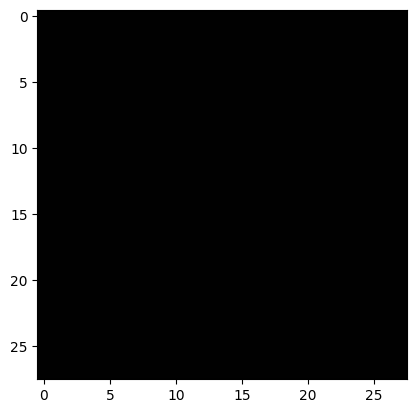

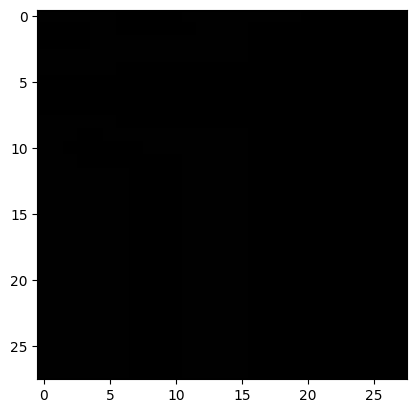

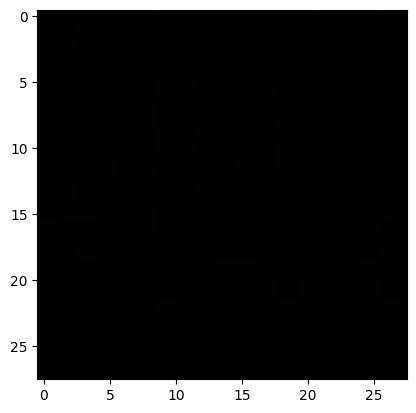

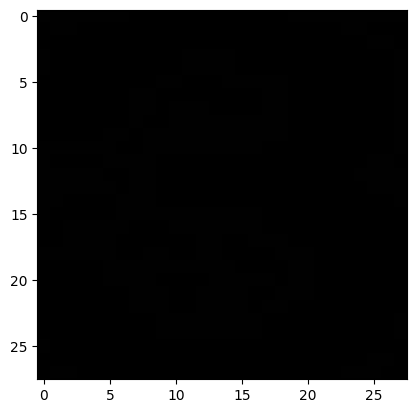

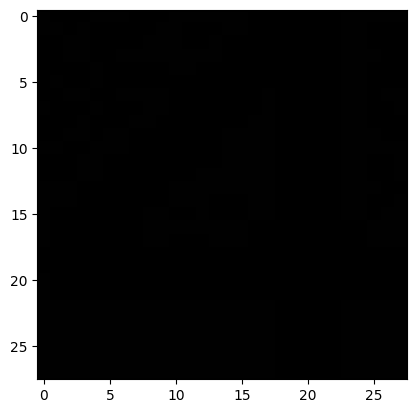

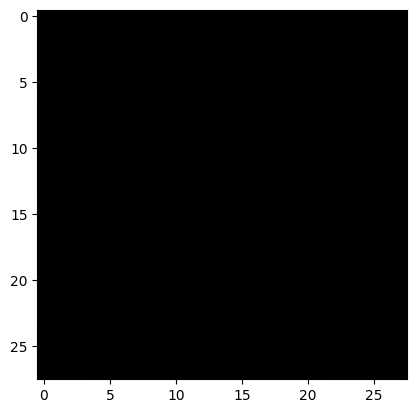

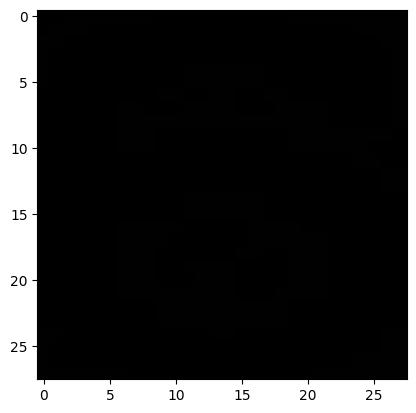

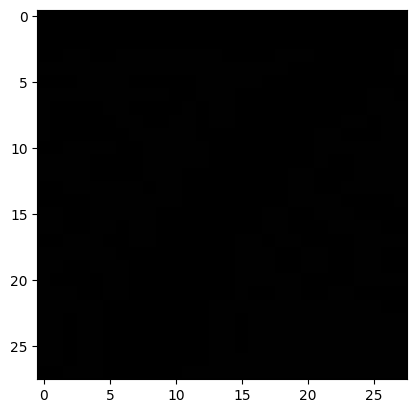

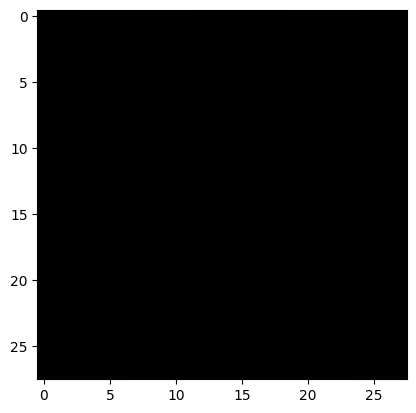

In [33]:
#in ra mảng data ở dạng ảnh
from matplotlib import pyplot as plt


for i in range(9):
    img = data[i].reshape(28, 28)
    img = Image.fromarray(img)
    plt.imshow(img)
    plt.show()

In [38]:
#lấy 
test_img = Image.open('test_digit/test_digit_4.jpg').resize((28, 28))
test_img = test_img.filter(ImageFilter.GaussianBlur(radius=1))
test_img = test_img.convert('L')
test_img = np.array(test_img)
test_img = test_img.reshape(784)
test_img = test_img / 255

#tính khoảng cách từ test_img đến các data
def distance(a, b):
    return np.linalg.norm(a - b)

def common(a,b):
    #đếm số điểm đen chung
    count = 0
    for i in range(784):
        if a[i] <=10 and b[i] <=10:
            count -= 1
    return count
#tìm ra data có khoảng cách nhỏ nhất
def find_nearest(data, test_img):
    min_dist = distance(data[0], test_img)
    min_index = 0
    for i in range(1, len(data)):
        dist = distance(data[i], test_img)
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return min_index

#in ra số gần nhất
#in ra tất cả các khoảng cách
for i in range(9):
    print(distance(data[i], test_img))

14.064671302745998
15.212012392526272
16.471446756336498
15.820732070448125
6.113021126840098
14.625529495831891
14.895173376867795
15.058821997548941
15.300450172167245
